# Practical 1

## Introduction
Let us first explore Tensorflow Playground to get some initial understanding of artificial neural networks. Visit the URL: https://playground.tensorflow.org/. Try classifying the Gaussian and the Exclusive OR datasets. 

First start with a single neuron (in a single layer) 
- Can the network classify the data points? 
- Try to restarting the training a few time, what do you observe? 
- Increase the neurons in a single layer and restart a few times. What happens? 
- Increase the number of layers and restart a few times. What happens?
- Try using a linear activation function. What happens?

You can also explore with the spiral and circle datasets.

## Building a simple model using Keras

Keras is a popular framework for developing and training models of neural network. It supports the Python programming language and allows developers to quickly define the neural network architecture

We will be using Google Colab to run the code. The interface for Colab is similar to Jupter Notebook, but it provides for an easily accessible GPU (with runtime limits) as well.

In this practical, we will build and train a simple feedforward neural network. Before we use Keras, we should import the relevant libraries.

Run the following codes to import numpy, tensorflow.keras and matplotlib packages which we will be using later.



In [1]:
import numpy as np
import tensorflow.keras as keras
from matplotlib import pyplot as plt

We will be using the MNIST dataset for this practical. As you might already know, the  MNIST dataset contains images of handwritten digits from 0 to 9. We will setup a neural network and use the data to train a model. We will then validate the model and determine the accuracy achieved.

First, download and load the MNIST dataset.

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

Once downloaded, we should examine the dataset to better understand the data we are working with.

Print the shape of the four variables ```train_x```, ```train_y```, ```test_x```, ```test_y```.

<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>
    
    
```python
print("train_x", train_x.shape)
print("train_y", train_y.shape)
print("test_x", test_x.shape)
print("test_y", test_y.shape)
```

</details>

In [3]:
# Enter your code here
train_x.shape

(60000, 28, 28)

There are 60000 images of training data each of which is of width 28 pixel and height 28 pixel. There are another 10000 images that will be used for testing.

We can take a look at how the first 10 images look like

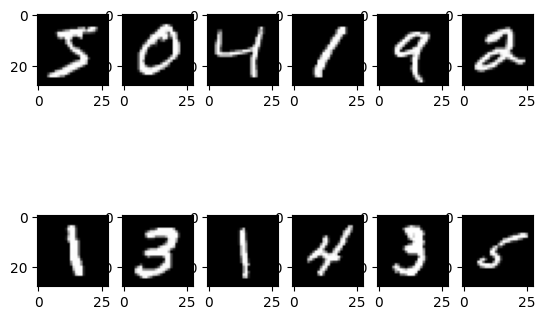

In [4]:
rows = 2
cols = 6
fig, axes = plt.subplots(rows, cols)
for j in range(rows):
    for i in range(cols):
        img=train_x[j*cols+i]
        axes[j, i].imshow(img,cmap='gray')

Take a look at the raw data values by printing the values of the first element of the ```train_x``` and ```train_y``` variables

<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>
    
    
```python
print(train_y[0])
print(train_x[0])
```

</details>

In [5]:
#Enter your codes here
print(train_y[0])
print(train_x[0])

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

For neural networks, a general guideline is to have small values for our inputs, in our case, we will scale the values to between 0.0 and 1.0.

Write some code to scale the input values between 0 and 1

<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>

```python
train_x_scaled = train_x / 255
test_x_scaled = test_x / 255
```


In [6]:
# Enter your code here
train_x_scaled = train_x / 255
test_x_scaled = test_x / 255

Let us train and test with a smaller number of samples.

Write some code to reduce the sample size for training to 1000 and testing to 500, taking only the first 1000 training data and 500 testing data.

<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>

```python
train_x_1000 = train_x_scaled[:1000]
train_y_1000 = train_y[:1000]
test_x_500 = test_x_scaled[:500]
test_y_500 = test_y[:500]
```


In [7]:
train_x_1000 = train_x_scaled[:1000]
train_y_1000 = train_y[:1000]
test_x_500 = test_x_scaled[:500]
test_y_500 = test_y[:500]

In this practical, we will be using a simple fully connected feedforward neural network (FNN) for the 28 x 28 image. Each pixel will be considered a feature so we will need to flatten the data into a single 784 feature 1-D array.

Run the following codes to flatten the training and testing input data.

In [8]:
train_x_1000 = train_x_1000.reshape(1000, 784) 
print(train_x_1000.shape)
test_x_500 = test_x_500.reshape(500, 784)
print(test_x_500.shape)

(1000, 784)
(500, 784)


We will now build the fully-connected neural network. 

Examine the following code and fill up the necessary blanks before running it.

In [9]:
#Create a Sequential Model
model = keras.Sequential()
# Add a Dense hidden layer to it. A Dense layer will be a fully-connected layer
model.add(keras.layers.Dense(128, input_shape=(784,), activation='relu')) #128 = 128 units. Fill up activation function in the string. 
# Add another Dense layer to serve as the output layer
model.add(keras.layers.Dense(10, activation='softmax')) #Output 10 units. Fill up the activation function in the string.

/Users/siewweiheng/miniconda3/envs/adl-1/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We can print a summary of the model as below

In [10]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


We will now compile the model. Don't worry too much about this line of code for now. We will cover these in lesson 2.



In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Let's train the model by running the following code


In [12]:
model.fit(train_x_1000, train_y_1000, epochs=5, validation_data=(test_x_500,  test_y_500))

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4470 - loss: 1.8512 - val_accuracy: 0.7460 - val_loss: 0.9533
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.6542 - val_accuracy: 0.8200 - val_loss: 0.6170
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8967 - loss: 0.4237 - val_accuracy: 0.8480 - val_loss: 0.5190
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9271 - loss: 0.3000 - val_accuracy: 0.8520 - val_loss: 0.4911
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9479 - loss: 0.2376 - val_accuracy: 0.8760 - val_loss: 0.4300


The training and validation accuracies are both quite high at 94.5% and 87.6%. Let us now use the model to perform predictions. To do that, we simply call the ```predict()``` function of the model.


In the code below, We pass in an array of test data to the ```predict()``` function for it to make predictions. The model will perform perdiction on each of the test data and outputs confidence levels for each of the 10 classes. We can choose the one with the highest confidence level as our prediction.

Execute the above codes and examine the output

In [13]:
predictions = model.predict(test_x_500)

for i in range(len(test_x_500)):
    print("Test Label: ", test_y_500[i])
    print(predictions[i])#List of confidence for each class
    print("Prediction made by model: ", np.argmax(predictions[i])) #Choose the one with the highest confidence
    print("\n")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Label:  7
[7.4993695e-05 7.9977626e-06 7.1098382e-04 1.1336335e-03 3.7185338e-05
 1.7094852e-04 1.5626309e-05 9.9204236e-01 6.8106747e-05 5.7381559e-03]
Prediction made by model:  7


Test Label:  2
[1.9025644e-02 1.6602811e-03 6.4578366e-01 5.1395617e-02 3.6363421e-05
 6.4122975e-02 2.0300041e-01 8.7488870e-06 1.4627987e-02 3.3829091e-04]
Prediction made by model:  2


Test Label:  1
[4.37195529e-04 8.96819413e-01 4.05359268e-02 3.48073873e-03
 1.05896569e-03 2.60811672e-03 1.03492215e-02 1.93280671e-02
 1.99061111e-02 5.47621865e-03]
Prediction made by model:  1


Test Label:  0
[9.6806413e-01 2.1230358e-06 1.8018753e-03 9.6216972e-05 4.4686883e-05
 1.4163206e-02 1.1935349e-02 2.6694550e-03 1.0475297e-04 1.1182498e-03]
Prediction made by model:  0


Test Label:  4
[1.3291251e-03 2.7648150e-04 1.3034175e-02 1.4728274e-03 8.3680105e-01
 2.0333189e-03 2.2389872e-02 4.2057481e-02 9.1112126e-03 7.1494475e-02]
Prediction made by model:  4


Test

Note that most of the predictions are correct but you should be able to see that there are some wrong predictions as well

## Additional Exercises

1. Change the epoch to 15 instead of 5. What do you notice about the accuracy on training data (acc) vs testing data (val_acc)?
2. Use all the provided samples instead of a subset of the samples.